In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('house_data.csv')

In [ ]:
dataset.insert(5,"x0",1)
print (dataset.head())


           id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 22 columns]


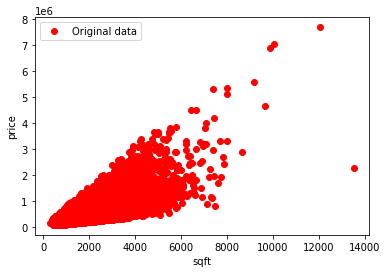

In [ ]:
x_data = dataset.iloc[:,[5,6]]
y_data = dataset['price']
plt.plot(x_data.iloc[:,1], y_data, 'ro', label='Original data') 
plt.xlabel("sqft")
plt.ylabel("price")
plt.legend()
plt.show()

In [ ]:
#scaling
x_max=x_data.iloc[:,1].max()
x_data.iloc[:,1]=(x_data.iloc[:,1])/(x_max)
print(x_max)
print(x_data)

13540
       x0  sqft_living
0       1     0.087149
1       1     0.189808
2       1     0.056869
3       1     0.144756
4       1     0.124077
...    ..          ...
21608   1     0.112999
21609   1     0.170606
21610   1     0.075332
21611   1     0.118168
21612   1     0.075332

[21613 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#convert to matrix
x_data=np.array(x_data)
y_data=np.array(y_data).flatten()
print(x_data.shape)
print(y_data.shape)

(21613, 2)
(21613,)


In [ ]:
#split data train & test 80/20
trainSize=int(y_data.size*.8)
print(trainSize)
xTrain=x_data[:trainSize]
xTest=x_data[trainSize:]

yTrain=y_data[:trainSize]
yTest=y_data[trainSize:]

print(xTrain,xTest)
print(len(yTrain),len(yTest))

17290
[[1.         0.08714919]
 [1.         0.18980798]
 [1.         0.05686854]
 ...
 [1.         0.18759232]
 [1.         0.38035451]
 [1.         0.25258493]] [[1.         0.1676514 ]
 [1.         0.1676514 ]
 [1.         0.10856721]
 ...
 [1.         0.07533235]
 [1.         0.11816839]
 [1.         0.07533235]]
17290 4323


In [ ]:
alpha=.4 
ceta=np.array([0,0])
mse=[]
def gradientDescentOneVar():
    global ceta,mse
    for i in range(10000):
        y_pred = xTrain.dot(ceta) 
        ceta = ceta - ((xTrain.T.dot(y_pred - yTrain)) * alpha * (1 / trainSize))
        ceta0,ceta1=ceta
        mse.append(MSE(ceta0,ceta1))
    #print("MSE = ",MSE(ceta0,ceta1))
    print("Theta: ",ceta)

In [ ]:
def MSE(ceta0,ceta1):
    Esum=0
    xTrain1=xTrain[:,1]
    for i in range(trainSize):
        Esum+=pow( yTrain[i] - (ceta0+ceta1*xTrain1[i]) , 2)
    Esum=Esum*(1/(2 * trainSize))
    return Esum

In [ ]:
gradientDescentOneVar()

Theta:  [ -49860.7552255  3843792.31231078]


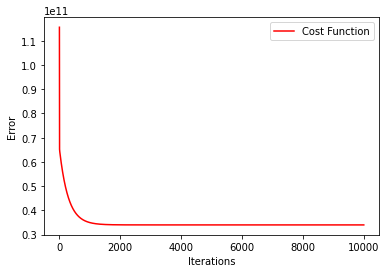

In [ ]:
plt.plot(mse, label='Cost Function',c='red') 
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.legend()
plt.show()

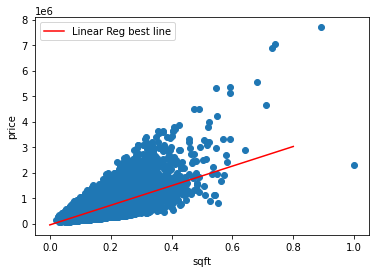

In [ ]:
plt.scatter(x_data[:,1], y_data)
xPoints = np.linspace(0,0.8,5)
yPoints = [ceta[0] + ceta[1]* x for x in xPoints]
plt.plot(xPoints, yPoints,color='red',label='Linear Reg best line') 
plt.xlabel("sqft")
plt.ylabel("price")
plt.legend()
plt.show()

In [ ]:
def predTest():
    ytestpred = xTest.dot(ceta)
    print('Predicted price:',ytestpred)
    print('Orignal price:',yTest)

In [ ]:
predTest()

Predicted price: [594556.41973354 594556.41973354 367449.04529864 ... 239701.147179
 404353.99364431 239701.147179  ]
Orignal price: [380000. 624900. 379770. ... 402101. 400000. 325000.]


In [ ]:
#Trying different alphas
#alpha = .1       iteration = 100000      MSE =  34012848737.616528
#alpha = .4       iteration = 10000       MSE =  34012848737.616543
#alpha = .01      iteration = 10000       MSE =  47225349578.991615
#alpha = .001     iteration = 50000       MSE =  54442254613.358246
#alpha = .0001    iteration = 100000      MSE =  62964040240.09301